In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 27.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 23.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy

     |████████████████████████████████| 64 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 70.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [6]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [9]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [10]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:02:35 +0000 2021'
'Thu Nov 04 19:02:35 +0000 2021'
'Thu Nov 04 19:02:34 +0000 2021'
'Thu Nov 04 19:02:34 +0000 2021'
'Thu Nov 04 19:02:33 +0000 2021'
'Thu Nov 04 19:02:33 +0000 2021'
'Thu Nov 04 19:02:32 +0000 2021'
'Thu Nov 04 19:02:32 +0000 2021'
'Thu Nov 04 19:02:32 +0000 2021'
'Thu Nov 04 19:02:31 +0000 2021'
'Thu Nov 04 19:02:31 +0000 2021'
'Thu Nov 04 19:02:30 +0000 2021'
'Thu Nov 04 19:02:30 +0000 2021'
'Thu Nov 04 19:02:30 +0000 2021'
'Thu Nov 04 19:02:30 +0000 2021'
'Thu Nov 04 19:02:29 +0000 2021'
'Thu Nov 04 19:02:27 +0000 2021'
'Thu Nov 04 19:02:26 +0000 2021'
'Thu Nov 04 19:02:26 +0000 2021'
'Thu Nov 04 19:02:26 +0000 2021'
'Thu Nov 04 19:02:26 +0000 2021'
'Thu Nov 04 19:02:25 +0000 2021'
'Thu Nov 04 19:02:25 +0000 2021'
'Thu Nov 04 19:02:25 +0000 2021'
'Thu Nov 04 19:02:24 +0000 2021'
'Thu Nov 04 19:02:24 +0000 2021'
'Thu Nov 04 19:02:22 +0000 2021'
'Thu Nov 04 19:02:22 +0000 2021'
'Thu Nov 04 19:02:22 +0000 2021'
'Thu Nov 04 19:02:21 +0000 2021'
'Thu Nov 0

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 19:01:43 +0000 2021'
'Thu Nov 04 19:01:43 +0000 2021'
'Thu Nov 04 19:01:43 +0000 2021'
'Thu Nov 04 19:01:43 +0000 2021'
'Thu Nov 04 19:01:43 +0000 2021'
'Thu Nov 04 19:01:42 +0000 2021'
'Thu Nov 04 19:01:42 +0000 2021'
'Thu Nov 04 19:01:42 +0000 2021'
'Thu Nov 04 19:01:42 +0000 2021'
'Thu Nov 04 19:01:41 +0000 2021'
'Thu Nov 04 19:01:41 +0000 2021'
'Thu Nov 04 19:01:40 +0000 2021'
'Thu Nov 04 19:01:38 +0000 2021'
'Thu Nov 04 19:01:38 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:37 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:36 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:34 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:33 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:32 +0000 2021'
'Thu Nov 04 19:01:31 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:00:04 +0000 2021'
'Thu Nov 04 19:00:04 +0000 2021'
'Thu Nov 04 19:00:04 +0000 2021'
'Thu Nov 04 19:00:03 +0000 2021'
'Thu Nov 04 19:00:03 +0000 2021'
'Thu Nov 04 19:00:03 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:02 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 04 19:00:01 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:58:13 +0000 2021'
'Thu Nov 04 18:58:12 +0000 2021'
'Thu Nov 04 18:58:11 +0000 2021'
'Thu Nov 04 18:58:11 +0000 2021'
'Thu Nov 04 18:58:10 +0000 2021'
'Thu Nov 04 18:58:09 +0000 2021'
'Thu Nov 04 18:58:09 +0000 2021'
'Thu Nov 04 18:58:09 +0000 2021'
'Thu Nov 04 18:58:07 +0000 2021'
'Thu Nov 04 18:58:06 +0000 2021'
'Thu Nov 04 18:58:03 +0000 2021'
'Thu Nov 04 18:58:03 +0000 2021'
'Thu Nov 04 18:58:01 +0000 2021'
'Thu Nov 04 18:58:01 +0000 2021'
'Thu Nov 04 18:58:00 +0000 2021'
'Thu Nov 04 18:58:00 +0000 2021'
'Thu Nov 04 18:58:00 +0000 2021'
'Thu Nov 04 18:57:59 +0000 2021'
'Thu Nov 04 18:57:59 +0000 2021'
'Thu Nov 04 18:57:59 +0000 2021'
'Thu Nov 04 18:57:56 +0000 2021'
'Thu Nov 04 18:57:56 +0000 2021'
'Thu Nov 04 18:57:56 +0000 2021'
'Thu Nov 04 18:57:56 +0000 2021'
'Thu Nov 04 18:57:55 +0000 2021'
'Thu Nov 04 18:57:53 +0000 2021'
'Thu Nov 04 18:57:51 +0000 2021'
'Thu Nov 04 18:57:50 +0000 2021'
'Thu Nov 04 18:57:49 +0000 2021'
'Thu Nov 04 18:57:48 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:55:57 +0000 2021'
'Thu Nov 04 18:55:57 +0000 2021'
'Thu Nov 04 18:55:56 +0000 2021'
'Thu Nov 04 18:55:55 +0000 2021'
'Thu Nov 04 18:55:55 +0000 2021'
'Thu Nov 04 18:55:55 +0000 2021'
'Thu Nov 04 18:55:55 +0000 2021'
'Thu Nov 04 18:55:54 +0000 2021'
'Thu Nov 04 18:55:54 +0000 2021'
'Thu Nov 04 18:55:54 +0000 2021'
'Thu Nov 04 18:55:53 +0000 2021'
'Thu Nov 04 18:55:53 +0000 2021'
'Thu Nov 04 18:55:53 +0000 2021'
'Thu Nov 04 18:55:52 +0000 2021'
'Thu Nov 04 18:55:52 +0000 2021'
'Thu Nov 04 18:55:52 +0000 2021'
'Thu Nov 04 18:55:51 +0000 2021'
'Thu Nov 04 18:55:50 +0000 2021'
'Thu Nov 04 18:55:49 +0000 2021'
'Thu Nov 04 18:55:49 +0000 2021'
'Thu Nov 04 18:55:47 +0000 2021'
'Thu Nov 04 18:55:47 +0000 2021'
'Thu Nov 04 18:55:47 +0000 2021'
'Thu Nov 04 18:55:47 +0000 2021'
'Thu Nov 04 18:55:44 +0000 2021'
'Thu Nov 04 18:55:44 +0000 2021'
'Thu Nov 04 18:55:43 +0000 2021'
'Thu Nov 04 18:55:42 +0000 2021'
'Thu Nov 04 18:55:42 +0000 2021'
'Thu Nov 04 18:55:41 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:53:47 +0000 2021'
'Thu Nov 04 18:53:46 +0000 2021'
'Thu Nov 04 18:53:44 +0000 2021'
'Thu Nov 04 18:53:44 +0000 2021'
'Thu Nov 04 18:53:42 +0000 2021'
'Thu Nov 04 18:53:42 +0000 2021'
'Thu Nov 04 18:53:41 +0000 2021'
'Thu Nov 04 18:53:40 +0000 2021'
'Thu Nov 04 18:53:39 +0000 2021'
'Thu Nov 04 18:53:38 +0000 2021'
'Thu Nov 04 18:53:37 +0000 2021'
'Thu Nov 04 18:53:37 +0000 2021'
'Thu Nov 04 18:53:36 +0000 2021'
'Thu Nov 04 18:53:36 +0000 2021'
'Thu Nov 04 18:53:34 +0000 2021'
'Thu Nov 04 18:53:34 +0000 2021'
'Thu Nov 04 18:53:33 +0000 2021'
'Thu Nov 04 18:53:33 +0000 2021'
'Thu Nov 04 18:53:33 +0000 2021'
'Thu Nov 04 18:53:32 +0000 2021'
'Thu Nov 04 18:53:31 +0000 2021'
'Thu Nov 04 18:53:30 +0000 2021'
'Thu Nov 04 18:53:30 +0000 2021'
'Thu Nov 04 18:53:28 +0000 2021'
'Thu Nov 04 18:53:28 +0000 2021'
'Thu Nov 04 18:53:27 +0000 2021'
'Thu Nov 04 18:53:27 +0000 2021'
'Thu Nov 04 18:53:27 +0000 2021'
'Thu Nov 04 18:53:26 +0000 2021'
'Thu Nov 04 18:53:26 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:51:23 +0000 2021'
'Thu Nov 04 18:51:21 +0000 2021'
'Thu Nov 04 18:51:21 +0000 2021'
'Thu Nov 04 18:51:21 +0000 2021'
'Thu Nov 04 18:51:21 +0000 2021'
'Thu Nov 04 18:51:20 +0000 2021'
'Thu Nov 04 18:51:19 +0000 2021'
'Thu Nov 04 18:51:19 +0000 2021'
'Thu Nov 04 18:51:19 +0000 2021'
'Thu Nov 04 18:51:17 +0000 2021'
'Thu Nov 04 18:51:17 +0000 2021'
'Thu Nov 04 18:51:16 +0000 2021'
'Thu Nov 04 18:51:16 +0000 2021'
'Thu Nov 04 18:51:15 +0000 2021'
'Thu Nov 04 18:51:13 +0000 2021'
'Thu Nov 04 18:51:13 +0000 2021'
'Thu Nov 04 18:51:12 +0000 2021'
'Thu Nov 04 18:51:11 +0000 2021'
'Thu Nov 04 18:51:10 +0000 2021'
'Thu Nov 04 18:51:10 +0000 2021'
'Thu Nov 04 18:51:10 +0000 2021'
'Thu Nov 04 18:51:09 +0000 2021'
'Thu Nov 04 18:51:09 +0000 2021'
'Thu Nov 04 18:51:08 +0000 2021'
'Thu Nov 04 18:51:08 +0000 2021'
'Thu Nov 04 18:51:07 +0000 2021'
'Thu Nov 04 18:51:07 +0000 2021'
'Thu Nov 04 18:51:06 +0000 2021'
'Thu Nov 04 18:51:06 +0000 2021'
'Thu Nov 04 18:51:06 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:49:16 +0000 2021'
'Thu Nov 04 18:49:14 +0000 2021'
'Thu Nov 04 18:49:14 +0000 2021'
'Thu Nov 04 18:49:13 +0000 2021'
'Thu Nov 04 18:49:13 +0000 2021'
'Thu Nov 04 18:49:12 +0000 2021'
'Thu Nov 04 18:49:12 +0000 2021'
'Thu Nov 04 18:49:11 +0000 2021'
'Thu Nov 04 18:49:11 +0000 2021'
'Thu Nov 04 18:49:10 +0000 2021'
'Thu Nov 04 18:49:10 +0000 2021'
'Thu Nov 04 18:49:10 +0000 2021'
'Thu Nov 04 18:49:08 +0000 2021'
'Thu Nov 04 18:49:07 +0000 2021'
'Thu Nov 04 18:49:06 +0000 2021'
'Thu Nov 04 18:49:05 +0000 2021'
'Thu Nov 04 18:49:05 +0000 2021'
'Thu Nov 04 18:49:05 +0000 2021'
'Thu Nov 04 18:49:05 +0000 2021'
'Thu Nov 04 18:49:03 +0000 2021'
'Thu Nov 04 18:49:02 +0000 2021'
'Thu Nov 04 18:49:02 +0000 2021'
'Thu Nov 04 18:49:02 +0000 2021'
'Thu Nov 04 18:49:01 +0000 2021'
'Thu Nov 04 18:49:01 +0000 2021'
'Thu Nov 04 18:49:00 +0000 2021'
'Thu Nov 04 18:49:00 +0000 2021'
'Thu Nov 04 18:48:59 +0000 2021'
'Thu Nov 04 18:48:57 +0000 2021'
'Thu Nov 04 18:48:57 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:47:06 +0000 2021'
'Thu Nov 04 18:47:06 +0000 2021'
'Thu Nov 04 18:47:05 +0000 2021'
'Thu Nov 04 18:47:05 +0000 2021'
'Thu Nov 04 18:47:04 +0000 2021'
'Thu Nov 04 18:47:03 +0000 2021'
'Thu Nov 04 18:47:03 +0000 2021'
'Thu Nov 04 18:47:03 +0000 2021'
'Thu Nov 04 18:47:01 +0000 2021'
'Thu Nov 04 18:47:01 +0000 2021'
'Thu Nov 04 18:47:00 +0000 2021'
'Thu Nov 04 18:47:00 +0000 2021'
'Thu Nov 04 18:46:59 +0000 2021'
'Thu Nov 04 18:46:59 +0000 2021'
'Thu Nov 04 18:46:58 +0000 2021'
'Thu Nov 04 18:46:58 +0000 2021'
'Thu Nov 04 18:46:57 +0000 2021'
'Thu Nov 04 18:46:57 +0000 2021'
'Thu Nov 04 18:46:56 +0000 2021'
'Thu Nov 04 18:46:56 +0000 2021'
'Thu Nov 04 18:46:55 +0000 2021'
'Thu Nov 04 18:46:55 +0000 2021'
'Thu Nov 04 18:46:54 +0000 2021'
'Thu Nov 04 18:46:54 +0000 2021'
'Thu Nov 04 18:46:54 +0000 2021'
'Thu Nov 04 18:46:54 +0000 2021'
'Thu Nov 04 18:46:53 +0000 2021'
'Thu Nov 04 18:46:52 +0000 2021'
'Thu Nov 04 18:46:52 +0000 2021'
'Thu Nov 04 18:46:51 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:44:44 +0000 2021'
'Thu Nov 04 18:44:43 +0000 2021'
'Thu Nov 04 18:44:42 +0000 2021'
'Thu Nov 04 18:44:42 +0000 2021'
'Thu Nov 04 18:44:42 +0000 2021'
'Thu Nov 04 18:44:41 +0000 2021'
'Thu Nov 04 18:44:41 +0000 2021'
'Thu Nov 04 18:44:40 +0000 2021'
'Thu Nov 04 18:44:39 +0000 2021'
'Thu Nov 04 18:44:39 +0000 2021'
'Thu Nov 04 18:44:38 +0000 2021'
'Thu Nov 04 18:44:36 +0000 2021'
'Thu Nov 04 18:44:35 +0000 2021'
'Thu Nov 04 18:44:35 +0000 2021'
'Thu Nov 04 18:44:34 +0000 2021'
'Thu Nov 04 18:44:32 +0000 2021'
'Thu Nov 04 18:44:32 +0000 2021'
'Thu Nov 04 18:44:31 +0000 2021'
'Thu Nov 04 18:44:31 +0000 2021'
'Thu Nov 04 18:44:31 +0000 2021'
'Thu Nov 04 18:44:31 +0000 2021'
'Thu Nov 04 18:44:31 +0000 2021'
'Thu Nov 04 18:44:30 +0000 2021'
'Thu Nov 04 18:44:30 +0000 2021'
'Thu Nov 04 18:44:30 +0000 2021'
'Thu Nov 04 18:44:30 +0000 2021'
'Thu Nov 04 18:44:29 +0000 2021'
'Thu Nov 04 18:44:29 +0000 2021'
'Thu Nov 04 18:44:29 +0000 2021'
'Thu Nov 04 18:44:28 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2278
1973


In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote


In [17]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Skeptic
text: @_evelynrae Covid Vaccines are safe. Billions have been vaccinated world over. Getting vaccinated is important to eradicate #COVID19
----
name: Mark
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: MARCUS
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: ✨Patricia✨
text: RT @EpochTimes: The #CDC altered the definition of “vaccine” because of concern that its definition did not apply to #Vaccines against #COV…
----
name: Ian Burrowes
text: @soledadobrien Question: "Are you vaccinated and what's your stance on vaccination"?
Yes, I have been immunized. An… https://t.co/0gE3VxQyCI
----
name: Mazenod
text: RT @Thompson_2017: MEP Christine ANDERSON speaks out against #Covid19 obligatory vaccination: “(...) I will not be vaccinated with anything…
----
name:

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote


In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,61843101782a8ab77cff9a20,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61843117782a8ab77cff9e58,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
2,61843107782a8ab77cff9b42,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
3,61843119782a8ab77cff9eb5,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
4,6184310e782a8ab77cff9c92,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,61843114782a8ab77cff9db4,Thu Nov 04 18:53:14 +0000 2021,1456333733519372294,1456333733519372294,RT @Thompson_2017: MEP Christine ANDERSON spea...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:58:27 +0000 2021...,1.456173e+18,1456173087792189441,False,NaN,NaN,NaN
6,61843119782a8ab77cff9ea9,Thu Nov 04 18:51:05 +0000 2021,1456333193070747650,1456333193070747650,@MarieMarchi Pfizer demande d’espacer de 15 jo...,False,"{'hashtags': [{'text': 'Vidal', 'indices': [68...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.456299e+18,...,False,False,fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,61843114782a8ab77cff9dd2,Thu Nov 04 18:53:03 +0000 2021,1456333687306469379,1456333687306469379,RT @CDCgov: Parents and Caregivers: CDC recomm...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 19:25:19 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
8,61843103782a8ab77cff9a6b,Thu Nov 04 19:00:11 +0000 2021,1456335482460114970,1456335482460114970,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
9,618430ff782a8ab77cff99ba,Thu Nov 04 19:01:17 +0000 2021,1456335761876258836,1456335761876258836,RT @WHO: When a #COVID19 vaccine becomes avail...,False,"

<AxesSubplot:>

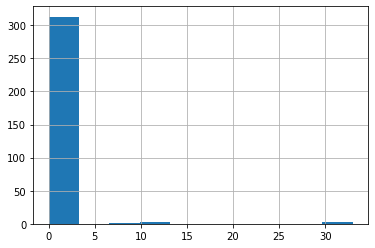

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count
